<a href="https://colab.research.google.com/github/slvrsrfrrr/Machine-Learning/blob/main/TS_Forecast_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prophet

This project uses Facebook Prophet to create predictions for prices over time. Prophet takes seasonality into account.

In [ ]:
pip install prophet

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
df = pd.read_csv('dataset.csv')

In [ ]:
df.head()

,Time Date,Product,Store,Value
0,1012018,2667437,QLD_CW_ST0203,2926.000
1,2012018,2667437,QLD_CW_ST0203,2687.531
2,3012018,2667437,QLD_CW_ST0203,2793.000
3,4012018,2667437,QLD_CW_ST0203,2394.000
4,5012018,2667437,QLD_CW_ST0203,2660.000


In [ ]:
print(df['Product'].unique())
print(df['Store'].unique())

[2667437]
['QLD_CW_ST0203']


In [ ]:
df.dtypes

Time Date      int64
Product        int64
Store         object
Value        float64
dtype: object

In [ ]:
df['Year'] = df['Time Date'].apply(lambda x: str(x)[-4:])
df['Month'] = df['Time Date'].apply(lambda x: str(x)[-6:-4])
df['Day'] = df['Time Date'].apply(lambda x: str(x)[:-6])
df['ds'] = pd.DatetimeIndex(df['Year']+'-'+df['Month']+'-'+df['Day'])


In [ ]:
df.head()

,Time Date,Product,Store,Value,Year,Month,Day,ds
0,1012018,2667437,QLD_CW_ST0203,2926.000,2018,01,1,2018-01-01
1,2012018,2667437,QLD_CW_ST0203,2687.531,2018,01,2,2018-01-02
2,3012018,2667437,QLD_CW_ST0203,2793.000,2018,01,3,2018-01-03
3,4012018,2667437,QLD_CW_ST0203,2394.000,2018,01,4,2018-01-04
4,5012018,2667437,QLD_CW_ST0203,2660.000,2018,01,5,2018-01-05


In [ ]:
#df.drop(['Time Date','Product','Store','Year','Month','Day'], axis=1,inplace=True)
df.columns = ['y','ds']
df.head()

,y,ds
0,2926.000,2018-01-01
1,2687.531,2018-01-02
2,2793.000,2018-01-03
3,2394.000,2018-01-04
4,2660.000,2018-01-05


In [ ]:
m = Prophet(interval_width=0.95,daily_seasonality=True)
model = m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp3skb9fbo/53zlva21.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp3skb9fbo/rzbfsngh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72272', 'data', 'file=/tmp/tmp3skb9fbo/53zlva21.json', 'init=/tmp/tmp3skb9fbo/rzbfsngh.json', 'output', 'file=/tmp/tmp3skb9fbo/prophet_modelxj8cq1ur/prophet_model-20231127160959.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:09:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:09:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=300,freq='D')
forecast = m.predict(future)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,3041.771182,920.042404,3880.295889,3041.771182,3041.771182,-640.520201,-640.520201,-640.520201,468.866564,...,16.599243,16.599243,16.599243,-1125.986008,-1125.986008,-1125.986008,0.0,0.0,0.0,2401.250981
1,2018-01-02,3042.521656,740.835507,3917.116928,3042.521656,3042.521656,-650.771051,-650.771051,-650.771051,468.866564,...,-11.296388,-11.296388,-11.296388,-1108.341227,-1108.341227,-1108.341227,0.0,0.0,0.0,2391.750605
2,2018-01-03,3043.272131,862.218275,3983.938030,3043.272131,3043.272131,-625.066377,-625.066377,-625.066377,468.866564,...,-4.417865,-4.417865,-4.417865,-1089.515076,-1089.515076,-1089.515076,0.0,0.0,0.0,2418.205755
3,2018-01-04,3044.022606,882.888337,4065.003002,3044.022606,3044.022606,-578.237548,-578.237548,-578.237548,468.866564,...,22.477984,22.477984,22.477984,-1069.582096,-1069.582096,-1069.582096,0.0,0.0,0.0,2465.785058
4,2018-01-05,3044.773081,857.459029,4038.519386,3044.773081,3044.773081,-614.374860,-614.374860,-614.374860,468.866564,...,-34.571885,-34.571885,-34.571885,-1048.669539,-1048.669539,-1048.669539,0.0,0.0,0.0,2430.398221


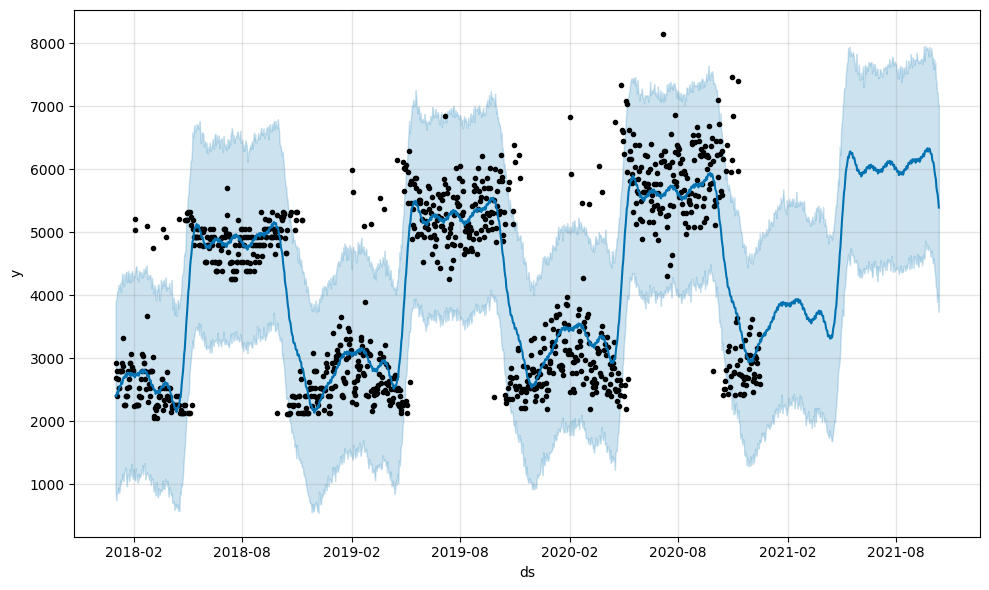

In [ ]:
plot1 = m.plot(forecast)

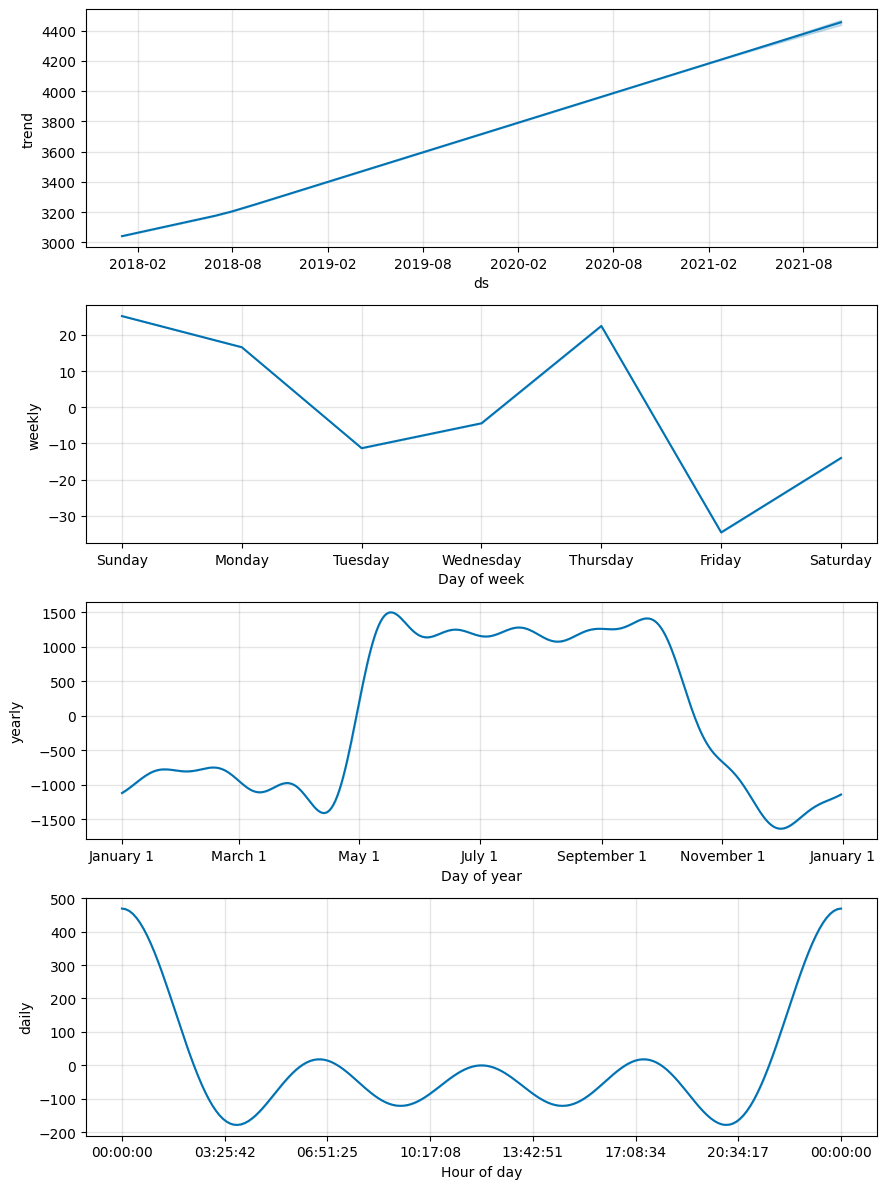

In [ ]:
plot2 = m.plot_components(forecast)